###### import numpy as np

In [2]:
import seaborn as sns

In [3]:
import matplotlib as mpl   
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

## Vou utilizar um conjunto de dados sobre cancelamentos de reservas em dois hoteis aparentemente de Portugal. Os dados podem ser encontrados em https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand.

## Meu objetivo a longo prazo é conseguir criar algum modelo que de alguma forma me informe a probabilidade de um cliente cancelar a reserva ou não.

In [5]:
hotel2 = pd.read_csv('ML hotel.csv', delimiter=";")

In [6]:
hotel2['auxiliar']=1

## Assim são os dados:

In [7]:
hotel2[0:9]

,hotel,foi cancelada,tempo de espera,dia da chegada,arrival_date_week_number,adults,children,babies,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,total_of_special_requests,auxiliar
0,Resort Hotel,0,342,0,27,2,0.0,0,Direct,0,0,0,0.0,0,1
1,Resort Hotel,0,737,0,27,2,0.0,0,Direct,0,0,0,0.0,0,1
2,Resort Hotel,0,7,0,27,1,0.0,0,Direct,0,0,0,75.0,0,1
3,Resort Hotel,0,13,0,27,1,0.0,0,Corporate,0,0,0,75.0,0,1
4,Resort Hotel,0,14,0,27,2,0.0,0,TA/TO,0,0,0,98.0,1,1
5,Resort Hotel,0,14,0,27,2,0.0,0,TA/TO,0,0,0,98.0,1,1
6,Resort Hotel,0,0,0,27,2,0.0,0,Direct,0,0,0,107.0,0,1
7,Resort Hotel,0,9,0,27,2,0.0,0,Direct,0,0,0,103.0,1,1
8,Resort Hotel,1,85,0,27,2,0.0,0,TA/TO,0,0,0,82.0,1,1


#### hotel é o tipo de hotel: resort hotel ou city hotel

#### foi cancelada é um boleano que assume valor 0 se a passagem não foi cancelada e 1 se foi

#### tempo de espera é o tempo entre a reserva e o dia de chegada (em teoria), se não me engano

#### adr (avarege daily rate) é o número de transações de hospedagem pelo número de dias de reserva

In [8]:
#hotel2.head

## Comparação entre frequências de reservas canceladas e não canceladas

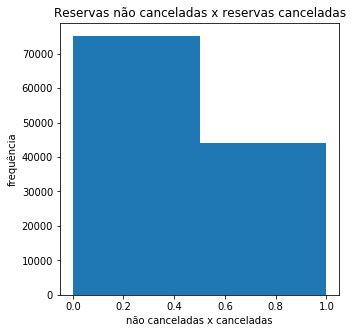

In [9]:
fig=plt.figure(figsize=(5,5))

ax = fig.add_subplot(1,1,1)
ax.hist(hotel2['foi cancelada'],bins = 2) # Here you can play with number of bins Labels and Tit
plt.title('Reservas não canceladas x reservas canceladas')
plt.xlabel('não canceladas x canceladas')
plt.ylabel('frequência')
plt.show()

## Comparação entre a frequência dos dois hoteis

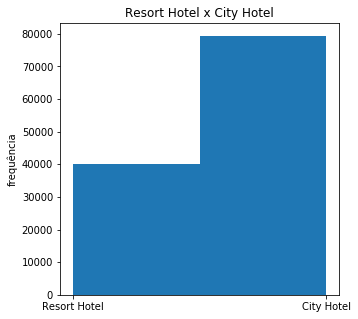

In [10]:
fig=plt.figure(figsize=(5,5))

ax = fig.add_subplot(1,1,1)
ax.hist(hotel2['hotel'],bins = 2) # Here you can play with number of bins Labels and Tit
plt.title('Resort Hotel x City Hotel')
plt.ylabel('frequência')
plt.show()

## Comparação entre as taxas de cancelamento de cada hotel

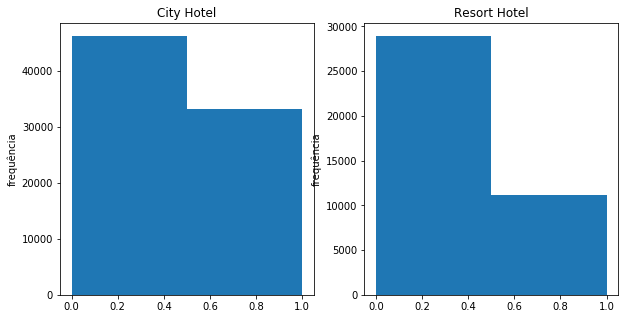

In [11]:
fig=plt.figure(figsize=(10,5))

ax = fig.add_subplot(1,2,1)
ax.hist(hotel2[hotel2['hotel']=='City Hotel']['foi cancelada'],bins = 2) # Here you can play with number of bins Labels and Tit
plt.title('City Hotel')
plt.ylabel('frequência')

bx = fig.add_subplot(1,2,2)
bx.hist(hotel2[hotel2['hotel']=='Resort Hotel']['foi cancelada'],bins = 2) # Here you can play with number of bins Labels and Tit
plt.title('Resort Hotel')
plt.ylabel('frequência')
plt.show()

## Aqui gostaria de comparar melhor as proporções de cancelamento de cada um dos hoteis, mas não consegui muito bem

In [38]:
# var = hotel2.groupby(['arrival_date_week_number','hotel'])['foi cancelada'].sum()
# var.unstack().plot(kind='bar',stacked=True,  color=['red','blue'], grid=False)

## Tentei visualizar se o adr parecia ter alguma influência nos cancelamento, mas um dado muito destoante do restante atrapalhou um pouco

In [13]:
max(hotel2['adr'])

5400.0

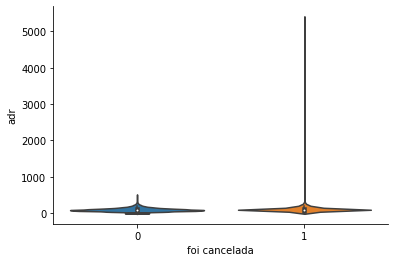

In [14]:
sns.violinplot(hotel2['foi cancelada'],hotel2['adr'])
sns.despine()

## Consegui fazer o mesmo gráfico excluindo esse dado muito fora do comum e consegui isso:

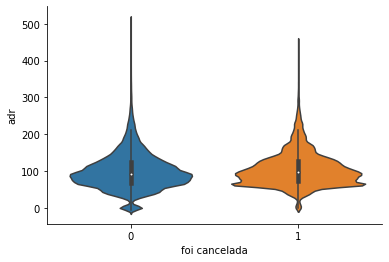

In [15]:
sns.violinplot(hotel2[hotel2['adr']!=5400.]['foi cancelada'],hotel2[hotel2['adr']!=5400.]['adr'])
sns.despine()

## Afinal, não parece haver muita diferença de preços entre as reservas canceladas e as não canceladas

## Tentei comparar os adr dos dois hotéis também, mas tive o mesmo problema com o dado destoante

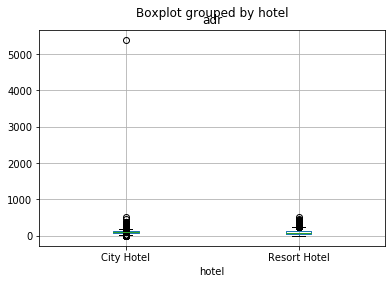

In [16]:
hotel2.boxplot('adr', by='hotel')

## Felizmente já sei lidar com isso e posso produzir um gráfico melhor para se visualizar, como podemos ver a seguir

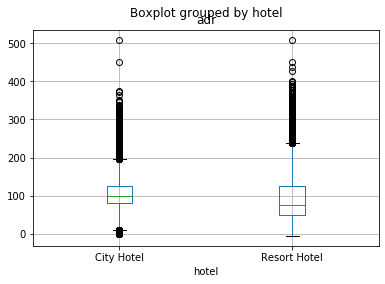

In [17]:
hotel2[hotel2['adr']!=5400.].boxplot('adr', by='hotel')

In [18]:
min(hotel2['adr']) #???

-6.38

## Distribuição dos tempos de Espera

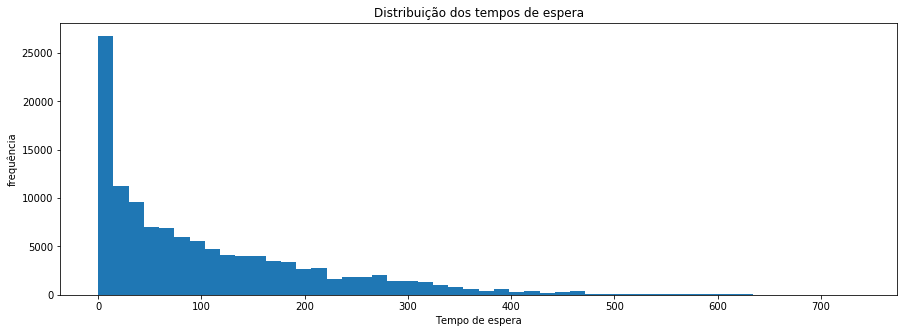

In [19]:
fig=plt.figure(figsize=(15,5))

ax = fig.add_subplot(1,1,1)
ax.hist(hotel2['tempo de espera'],bins = 50) # Here you can play with number of bins Labels and Tit
plt.title('Distribuição dos tempos de espera')
plt.xlabel('Tempo de espera')
plt.ylabel('frequência')
plt.show()

## Plotei o número de chegadas em cada dia e percebi que é de alguma forma cíclico, então decidi plotar separadamante os dados só do primeiro ano; fiz isso para outros gráficos também.

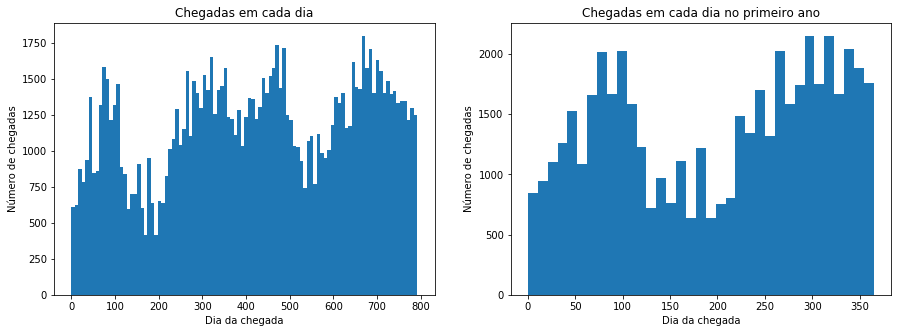

In [20]:
fig=plt.figure(figsize=(15,5))

ax = fig.add_subplot(1,2,1)
ax.hist(hotel2['dia da chegada'],bins = 100) # Here you can play with number of bins Labels and Tit
plt.title('Chegadas em cada dia')
plt.xlabel('Dia da chegada')
plt.ylabel('Número de chegadas')

abx = fig.add_subplot(1,2,2)
#Variable
abx.hist(hotel2['dia da chegada'],range=[0,365],bins = 35) # Here you can play with number of bins Labels and Tit
plt.title('Chegadas em cada dia no primeiro ano')
plt.xlabel('Dia da chegada')
plt.ylabel('Número de chegadas')
plt.show()

## Aqui plotei o número de chegadas em cada semana do ano. Perceba que como um ano tem 54 semanas, para que o gráfico não tenha espações em branco, o número de bins tem que ser menor ou igual a este núemro.

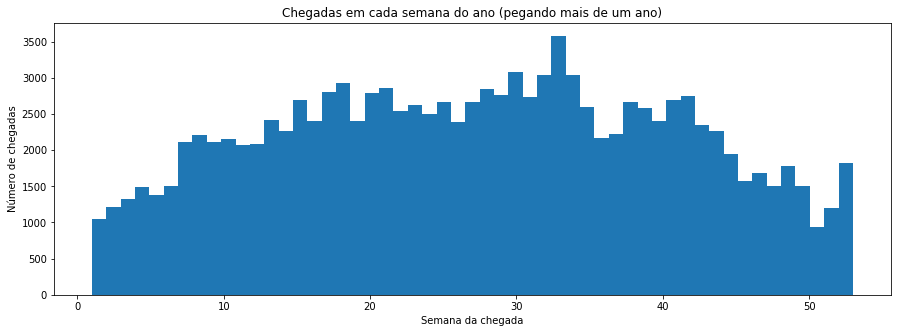

In [21]:
fig=plt.figure(figsize=(15,5))

ax = fig.add_subplot(1,1,1)
ax.hist(hotel2['arrival_date_week_number'],bins = 53) #um ano tem 53 semanas, eu acho, então se você colocar mais q isso de bins vai comear a ficar com vãos
plt.title('Chegadas em cada semana do ano (pegando mais de um ano)')
plt.xlabel('Semana da chegada')
plt.ylabel('Número de chegadas')
plt.show()

## O número de chegadas é contado a partir do número que a semana aparece em alguma reserva. Isso significa que não está exatamente relacionado ao número de pessoas. Penso em corrigir isso futuramente.

## Os histogramas de adr com e sem aquele dado meio absurdo.

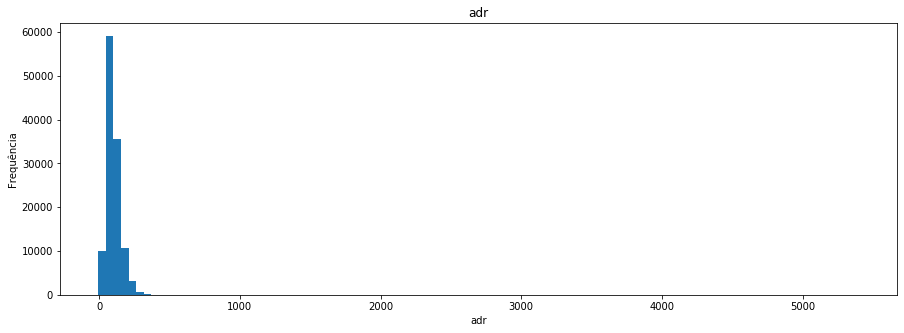

In [22]:
fig=plt.figure(figsize=(15,5))
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)
ax.hist(hotel2['adr'],bins = 100)
plt.title('adr')
plt.xlabel('adr')
plt.ylabel('Frequência')
plt.show()

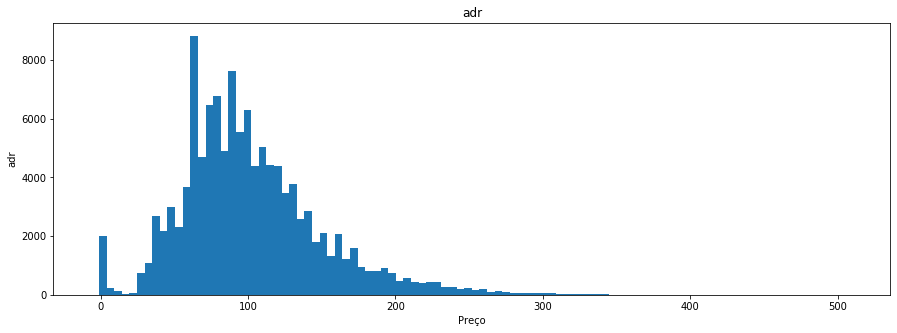

In [23]:
fig=plt.figure(figsize=(15,5))
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)
ax.hist(hotel2[hotel2['adr']!=5400.]['adr'],bins = 100)
plt.title('adr')
plt.xlabel('Preço')
plt.ylabel('adr')
plt.show()

In [24]:
#fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
# ax.scatter(hotel2['dia da chegada'],hotel2['foi cancelada']) #You can also add more variables here to represent color and size.
# plt.show()

In [25]:
# S=[]
# for i in range(max(hotel2['dia da chegada'])):
#     s=[0,0]
#     for j in range(len(hotel2['dia da chegada'])):
#         if hotel2['dia da chegada'][j]==i:
#             if hotel2['foi cancelada'][j]:
#                 s[0]+=1
#             else:
#                 s[1]+=1
#     S.append(s)

In [26]:
A=hotel2.groupby('dia da chegada')['foi cancelada'].sum()
B=hotel2.groupby('dia da chegada')['auxiliar'].sum()

In [27]:
B

dia da chegada
0      122
1       93
2       56
3       88
4       53
      ... 
788    174
789    211
790    125
791     89
792    134
Name: auxiliar, Length: 793, dtype: int64

In [28]:
A

dia da chegada
0      19
1      57
2      19
3      43
4      16
       ..
788    49
789    64
790    44
791    27
792    45
Name: foi cancelada, Length: 793, dtype: int64

In [29]:
A/B

dia da chegada
0      0.155738
1      0.612903
2      0.339286
3      0.488636
4      0.301887
         ...   
788    0.281609
789    0.303318
790    0.352000
791    0.303371
792    0.335821
Length: 793, dtype: float64

In [30]:
19/122

0.1557377049180328

In [31]:
len(A/B[0:365])

793

## Razão de cancelamentos por reservas totais em cada dia.

Text(0, 0.5, 'Cancelamentos/total de reservas')

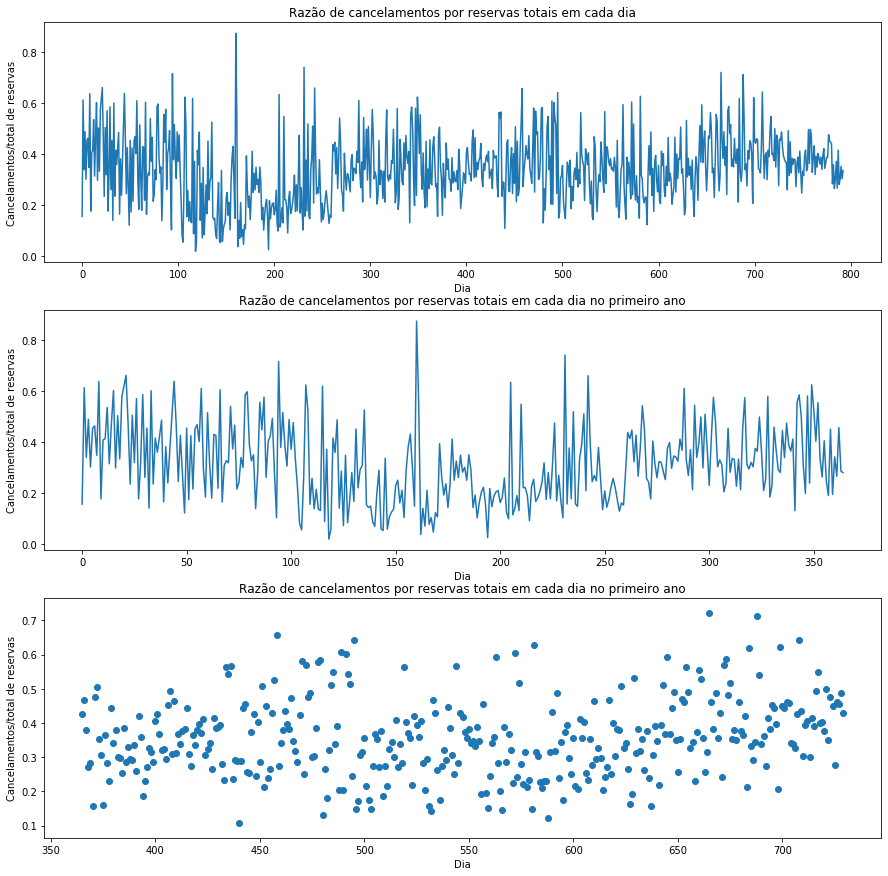

In [32]:
fig=plt.figure(figsize=(15,15))

ax = fig.add_subplot(3,1,1)
ax.plot(A/B)
plt.title('Razão de cancelamentos por reservas totais em cada dia')
plt.xlabel('Dia')
plt.ylabel('Cancelamentos/total de reservas')

bx = fig.add_subplot(3,1,2)
bx.plot(A/B[0:365])
plt.title('Razão de cancelamentos por reservas totais em cada dia no primeiro ano')
plt.xlabel('Dia')
plt.ylabel('Cancelamentos/total de reservas')

cx = fig.add_subplot(3,1,3)
cx.scatter(range(793),A/B[365:2*365])
plt.title('Razão de cancelamentos por reservas totais em cada dia no primeiro ano')
plt.xlabel('Dia')
plt.ylabel('Cancelamentos/total de reservas')


## Cancelamentos totais agora

Text(0, 0.5, 'Número de cancelamentos')

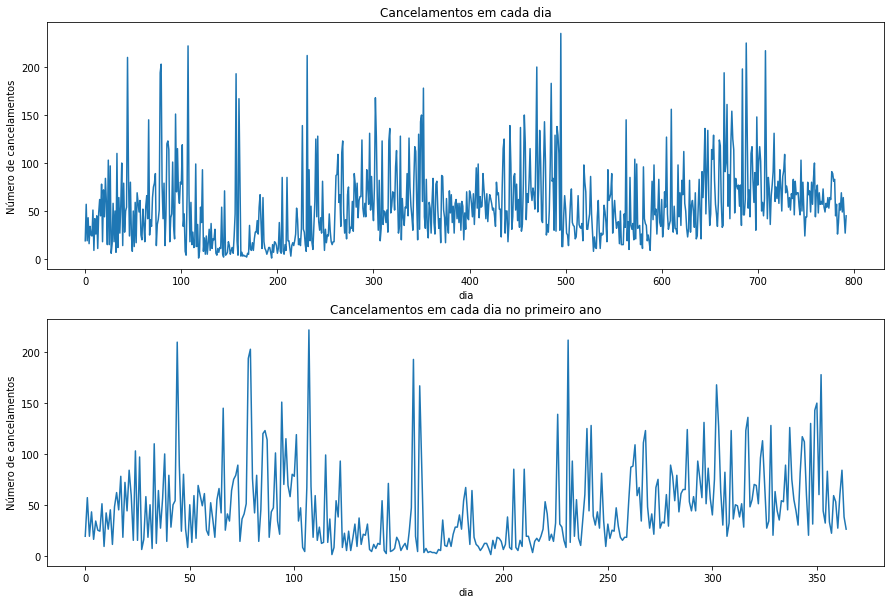

In [33]:
fig=plt.figure(figsize=(15,10))

ax = fig.add_subplot(2,1,1)
ax.plot(A)
plt.title('Cancelamentos em cada dia')
plt.xlabel('dia')
plt.ylabel('Número de cancelamentos')

bx = fig.add_subplot(2,1,2)
bx.plot(A[0:365])
plt.title('Cancelamentos em cada dia no primeiro ano')
plt.xlabel('dia')
plt.ylabel('Número de cancelamentos')

## Razões de Cancelamentos e Cancelamentos segundo semana de chegada

In [34]:
C=hotel2.groupby('arrival_date_week_number')['foi cancelada'].sum()
D=hotel2.groupby('arrival_date_week_number')['auxiliar'].sum()

Text(0, 0.5, 'Número de cancelamentos')

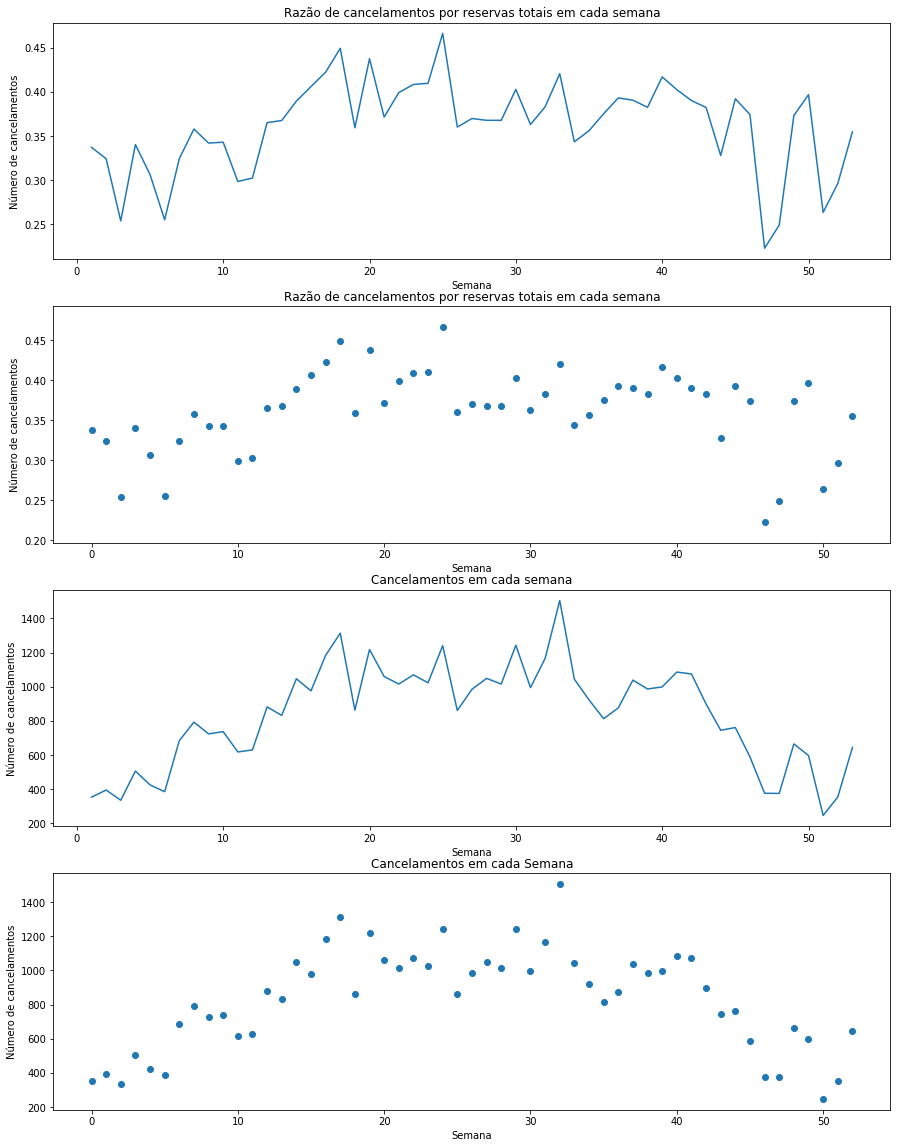

In [35]:
fig=plt.figure(figsize=(15,20))

ax = fig.add_subplot(4,1,1)
ax.plot(C/D)
plt.title('Razão de cancelamentos por reservas totais em cada semana')
plt.xlabel('Semana')
plt.ylabel('Número de cancelamentos')

bx=fig.add_subplot(4,1,2)
bx.scatter(range(len(C/D)),C/D)
plt.title('Razão de cancelamentos por reservas totais em cada semana')
plt.xlabel('Semana')
plt.ylabel('Número de cancelamentos')

cx = fig.add_subplot(4,1,3)
cx.plot(C)
plt.title('Cancelamentos em cada semana')
plt.xlabel('Semana')
plt.ylabel('Número de cancelamentos')

dx=fig.add_subplot(4,1,4)
dx.scatter(range(len(C)),C)
plt.title('Cancelamentos em cada Semana')
plt.xlabel('Semana')
plt.ylabel('Número de cancelamentos')

## Razões de cancelamentos e cancelamentos totais por tempos de espera.

In [36]:
E=hotel2.groupby('tempo de espera')['foi cancelada'].sum()
F=hotel2.groupby('tempo de espera')['auxiliar'].sum()

Text(0.5, 1.0, 'Cancelamentos')

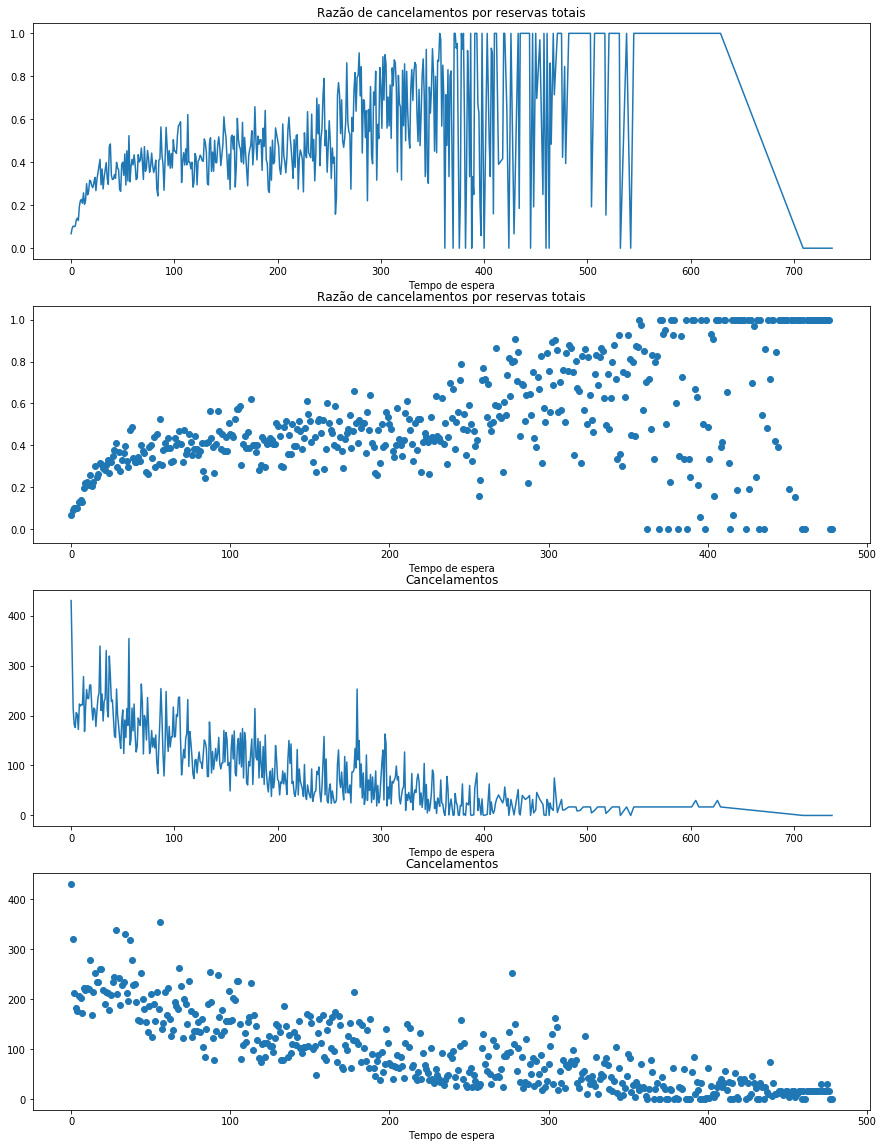

In [37]:
fig=plt.figure(figsize=(15,20))
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(4,1,1)
ax.plot(E/F)
plt.title('Razão de cancelamentos por reservas totais por tempo de espera')
plt.xlabel('Tempo de espera')
plt.title('Razão de cancelamentos por reservas totais')

bx=fig.add_subplot(4,1,2)
bx.scatter(range(len(E/F)),E/F)
plt.title('Razão de cancelamentos por reservas totais por tempo de espera')
plt.xlabel('Tempo de espera')
plt.title('Razão de cancelamentos por reservas totais')

cx = fig.add_subplot(4,1,3)
cx.plot(E)
plt.title('Cancelamentos por tempo de espera')
plt.xlabel('Tempo de espera')
plt.title('Cancelamentos')

dx=fig.add_subplot(4,1,4)
dx.scatter(range(len(E)),E)
plt.title('Cancelamentos por tempo de espera')
plt.xlabel('Tempo de espera')
plt.title('Cancelamentos')